In [1]:
import matplotlib
matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
matplotlib.rcParams.update(pgf_with_rc_fonts)
%matplotlib inline
matplotlib.style.use('ggplot')

import matplotlib.pyplot as plt

In [2]:
import cPickle as pkl
import pandas as pd
import numpy as np

In [3]:
filepath = "../../results/updated Shah transcriptome, full exome, no decay, updated initiation rates according to Shah_20170331_2025_200000_ribosomes_3600s.p"

In [4]:
results = pkl.load(open(filepath))

In [5]:
results.keys()

['n_tRNA',
 'description',
 'n_ribosomes',
 'timerange',
 'proteome',
 'transcriptome',
 'time_stamp',
 'duration',
 'peptide_bonds',
 'timecourses']

Remove blacklisted names from protein names list:

In [6]:
protnames = results['timecourses'].keys()
blacklist = ['ribos._bound', 'ribos._free', 'tRNA_free', 'tRNA_bound', 'ATP', 'GTP', 'AMP', 'GDP', 'protein', 
             'peptide_bonds']
for fragment in blacklist:
    protnames = [name for name in protnames if fragment not in name]

Define equilibrated protein synthesis rates:

In [7]:
prot_speeds = {}

for prot in protnames:
    start, stop = 599, len(results['timecourses'][prot]) - 1  # 599 to exclude the "burn in" phase
    prot_speeds[prot] = (results['timecourses'][prot][stop] - results['timecourses'][prot][start]) / (1.0 * results['timerange'][stop] - results['timerange'][start])
    if prot_speeds[prot] > 100: 
        print prot, prot_speeds[prot]

YKL060C 145.73251336288234
YAL038W 123.38209092480422
YJL189W 115.12959770118529
YCR012W 112.47428013107705
YOL086C 117.84700270134138
YLR110C 108.4815219265813
YLR044C 193.92298850580755
YKL152C 115.67130294848134


In [8]:
pd.Series(prot_speeds.values()).describe()

count    4475.000000
mean        1.349305
std         7.847669
min         0.001149
25%         0.049425
50%         0.122989
75%         0.379763
max       193.922989
dtype: float64

Same but normalized per transcript:

In [9]:
transcriptome_shah = pkl.load(open('../../parameters/transcriptome_shah.p'))

In [10]:
prot_per_transcript_speeds = {}

for prot in protnames:
    start, stop = 599, len(results['timecourses'][prot]) - 1  # 599 to exclude the "burn in" phase
    prot_per_transcript_speeds[prot] = (results['timecourses'][prot][stop] - results['timecourses'][prot][start]) / \
        transcriptome_shah[prot] / (1.0 * results['timerange'][stop] - results['timerange'][start])
    if prot_per_transcript_speeds[prot] > 0.20: 
        print prot, prot_per_transcript_speeds[prot]

YJL189W 0.20833333333339824
YJL158C 0.22127708489000514
YDR461W 0.23591954022995856
YLR325C 0.20028735632190148
YDR224C 0.2241508132652
YLR061W 0.20057471264374063
YLR388W 0.23132183908053183


In [11]:
pd.Series(prot_per_transcript_speeds).describe()

count    4475.000000
mean        0.046298
std         0.029389
min         0.000575
25%         0.026149
50%         0.039370
75%         0.058621
max         0.235920
dtype: float64

In [12]:
plt.rcParams['axes.facecolor']='white'
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'

In [15]:
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['figure.figsize'] = (12, 5)

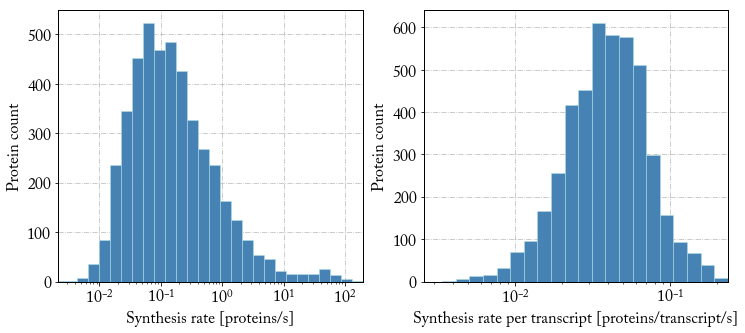

In [16]:
myedgecolor = 'powderblue'
myfacecolor = 'steelblue'

plt.figure(1)
plt.subplot(121)
plt.hist(prot_speeds.values(), bins = 10**np.linspace(np.log10(min(prot_speeds.values())+0.0001), 
                                                      np.log10(max(prot_speeds.values())), 30), 
         edgecolor=myedgecolor, facecolor=myfacecolor)
plt.gca().set_xscale("log")
plt.gca().set_xlim([min(prot_speeds.values())+0.001, max(prot_speeds.values())])
plt.gca().set_xlabel('Synthesis rate [proteins/s]', fontsize=16)
plt.gca().set_ylabel('Protein count', fontsize=16)
plt.setp(plt.gca().get_xticklabels(), fontsize=16)
plt.setp(plt.gca().get_yticklabels(), fontsize=16)

plt.subplot(122)
plt.hist(prot_per_transcript_speeds.values(), bins = 10**np.linspace(np.log10(min(prot_per_transcript_speeds.values())+0.0001), 
                                                                     np.log10(max(prot_per_transcript_speeds.values())), 30),
         edgecolor=myedgecolor, facecolor=myfacecolor)
plt.gca().set_xscale("log")
plt.gca().set_xlim([min(prot_per_transcript_speeds.values())+0.002, max(prot_per_transcript_speeds.values())])
plt.gca().set_xlabel('Synthesis rate per transcript [proteins/transcript/s]', fontsize=16)
plt.gca().set_ylabel('Protein count', fontsize=16)
plt.setp(plt.gca().get_xticklabels(), fontsize=16)
plt.setp(plt.gca().get_yticklabels(), fontsize=16)

plt.savefig('TRSL_synthesis_rate_distribution.pgf', bbox_inches='tight')